<a href="https://colab.research.google.com/github/Dankort/lab-imbalanced-data/blob/master/lab%20imbalanced-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder



df = pd.read_csv("/customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Load the dataset and explore the variables. EDA

In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Get summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

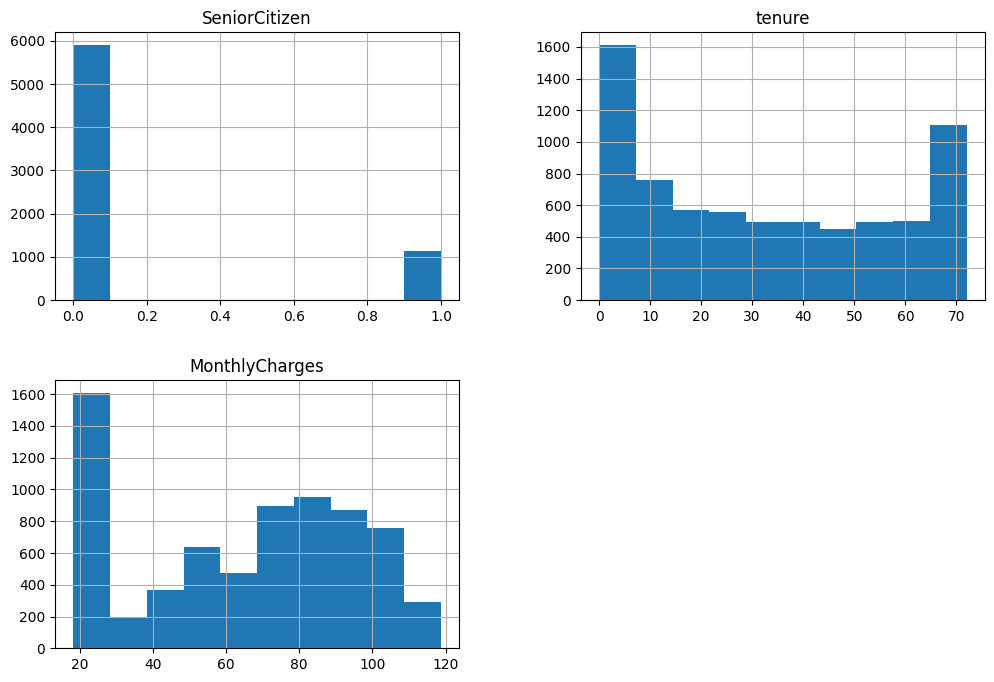

In [ ]:
# Plot histograms for numeric variables
df.hist(figsize=(12, 8))
plt.show()

In [ ]:
#which ones are categorical
categorical_columns = df.select_dtypes("object")
categorical_columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [ ]:
numerical_columns = df.select_dtypes("number")
numerical_columns

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


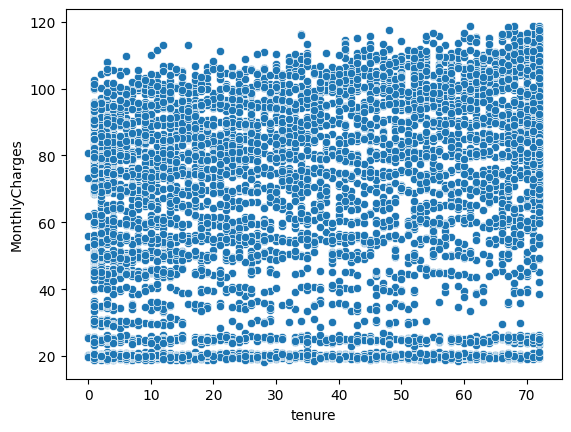

In [ ]:
# Scatter plot for two numeric variables
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df)
plt.show()

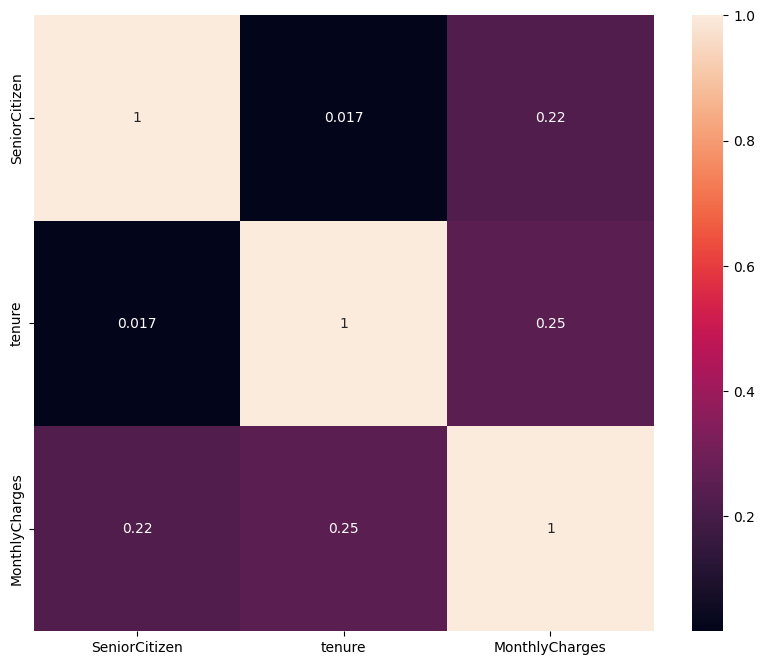

In [ ]:
# Compute and visualize correlation matrix


corr_matrix=df.select_dtypes("number").corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

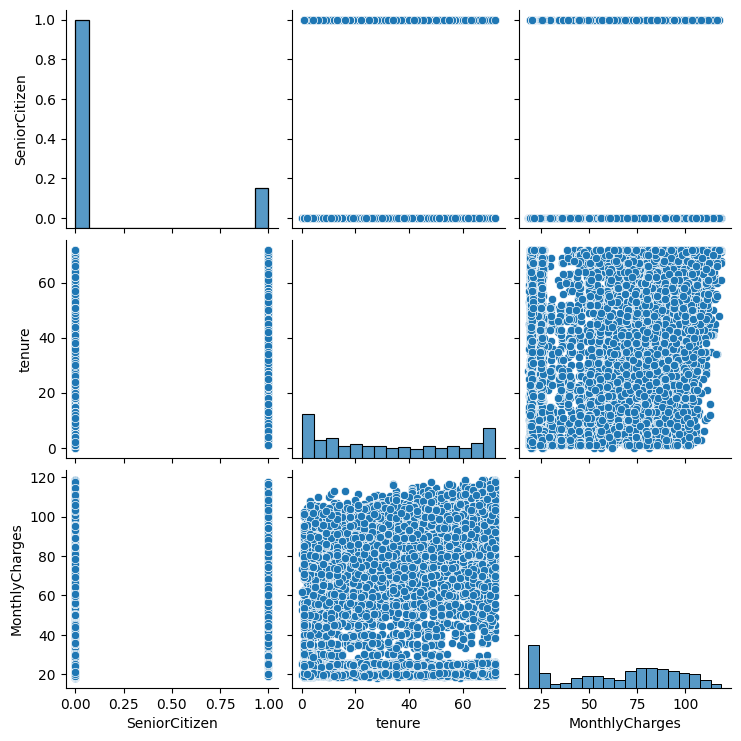

In [ ]:
# Pair plot for multiple variables
sns.pairplot(df)
plt.show()

2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.


In [ ]:
# Define features (X) and target variable (y)
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')

Accuracy: 0.81
Confusion Matrix:
[[956  80]
 [194 179]]
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.69      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409



3. Extracting my target Variable

In [ ]:
target_variable = df['Churn']
target_variable

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

4. Extract the independent variables and scale them.

In [ ]:
# Extract the independent variables (features)
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

# Scale the independent variables using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-1.27744458, -0.43991649, -1.16032292],
       [ 0.06632742, -0.43991649, -0.25962894],
       [-1.23672422, -0.43991649, -0.36266036],
       ...,
       [-0.87024095, -0.43991649, -1.1686319 ],
       [-1.15528349,  2.27315869,  0.32033821],
       [ 1.36937906, -0.43991649,  1.35896134]])

5. Build the logistic regression model.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')

Accuracy: 0.81
Confusion Matrix:
[[957  79]
 [192 181]]
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.92      0.88      1036
         Yes       0.70      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



7. Here some main reasons why even a simple model will give us more than 70% accuracy

1.Predictive Features: The features you've chosen ('tenure', 'SeniorCitizen', 'MonthlyCharges') could be strongly associated with the target variable 'Churn'. If these features have a clear impact on the likelihood of churn, the model can leverage this information for accurate predictions.

2.Linear Relationship: Logistic regression assumes a linear relationship between the features and the log-odds of the target variable. If the relationship is approximately linear, logistic regression can perform well.

3.Data Separability: The data might be well-separated or nearly separable, making it easier for the logistic regression model to find a decision boundary that separates the classes.

4.No Multicollinearity: The chosen features may not exhibit strong multicollinearity, which can negatively impact the performance of logistic regression. Multicollinearity occurs when independent variables are highly correlated.

While achieving over 70% accuracy is a positive sign, it's crucial to thoroughly evaluate the model using various metrics and consider potential challenges such as overfitting, underfitting, and the need for more complex models in different scenarios. Additionally, assessing the business context and the cost of false positives/negatives can provide more insight into the model's practical utility.


8. Synthetic Minority Oversampling TEchnique (SMOTE)

In [ ]:
# SMOTE
# Uses knn to create rows with similar features from the minority classes.
from imblearn.over_sampling import SMOTE

X = pd.get_dummies(df.drop('Churn', axis=1))
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

No     4139
Yes    4139
Name: Churn, dtype: int64

In [ ]:
y_test.value_counts()

No     1035
Yes     374
Name: Churn, dtype: int64

In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')

Accuracy: 0.73
Confusion Matrix:
[[1035    0]
 [ 374    0]]
Classification Report:
              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1035
         Yes       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random
# remove random rows from majority classes
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X = df.drop('Churn', axis=1)
y = df['Churn']

X_, y_ = rus.fit_resample(X, y)
y_.value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

9. Tomek links.

the accuracy decrease 0.02
and the comparation yes decrease and the NO increase.
          No       0.84      0.88      0.86      1036
         Yes       0.63      0.55      0.58       373



In [ ]:
# Tomek Links
# Pairs of almost similar rows from opposite classes (boundary rows).
# Removing the row of the majority class from each pair helps the classifier.
from imblearn.under_sampling import TomekLinks

# Extracting the target variable
y = df['Churn']

# Extracting my features (features)
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Tomek Links undersampling to the training set
tomek_links = TomekLinks(sampling_strategy='auto')
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_train, y_train)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the resampled and scaled training set
model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')




Accuracy: 0.79
Confusion Matrix:
[[915 121]
 [169 204]]
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1036
         Yes       0.63      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409

